# Entrega 1 - Árboles de Decisión

### Grupo 50:
    - M. Ramilo (5.665.788-5)
    - G. Dinello (5.031.022-5)
    - F. Crocamo (4.732.816-6)


## 1. Objetivo


El objetivo de esta tarea es construir un clasificador utilizando el ***algoritmo ID3*** para la construcción de ***árboles de decisión*** capaces de clasificar datos. A través de este proceso, se explorará cómo el algoritmo analiza las características de los datos y toma decisiones inteligentes para separarlos en ramas del árbol que reflejen patrones y relaciones subyacentes.


El éxito del aprendizaje se mide a través de distintas métricas tales como ***accuracy*** y ***fscore***, ambas permiten medir que tan bien funciona el clasificador en su generalidad. Estas métricas proporcionaran una comprensión cuantitativa del rendimiento del algoritmo y su capacidad para generalizar a nuevos datos.


Para esta tarea se utilizará el dataset de ***["Predict students dropout and academic success"](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)***.


Además se ***comparará el desempeño del clasificador con implementaciónes disponibles de la biblioteca `scikit-learn`***, una de las herramientas más poderosas y versátiles en el ámbito del aprendizaje automático en Python.


## 2. Diseño

En esta sección se presentan las decisiones tomadas a la hora de implementar el clasificador.

### 2.1 Preprocesamiento de datos

#### 2.1.1 Se importan las librerias necesarias para el preprocesamiento

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, KBinsDiscretizer

#### 2.1.2 Carga de datos

Se cargan los datos del dataset ***"data.csv"*** en un dataframe de pandas y se despliega informacion general de los datos cargados. 

In [2]:
data = pd.read_csv('data.csv', sep=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


#### 2.1.3 Preprocesamiento del atributo objetivo (Target)

El atributo objetivo (Target) es el atributo que quiere predecir, este tiene 3 posibles valores: ***"Graduate"***, ***"Dropout"*** y ***"Enrolled"***. Se consideraran a los valores ***"Enrolled"*** y ***"Graduate"*** como uno solo. Por lo tanto, el atributo objetivo tendrá 2 posibles valores: ***"Graduate/Enrolled"*** y ***"Dropout"***.

Los valores que toma el atributo objetivo son:

In [4]:
data["Target"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

Se cambian los valores del atributo objetivo ***"Target"*** de ***"Enrolled"*** y ***"Graduate"*** a ***"Graduate/Enrolled"***.

In [5]:
data["Target"] = data["Target"].replace(to_replace=["Graduate", "Enrolled"], value="Graduate/Enrolled")
data["Target"].value_counts()

Graduate/Enrolled    3003
Dropout              1421
Name: Target, dtype: int64

Se crea un codificador "ordinal" y se ajusta a la columna ***"Target"***, luego se transforma la columna ***"Target"*** con el codificador.

In [6]:
enc = OrdinalEncoder()
enc.fit(data[['Target']])
for i, cat in enumerate(enc.categories_[0]): print(f"{cat} -> {i}")

data['Target'] = enc.transform(data[['Target']])

data.head(3)

Dropout -> 0
Graduate/Enrolled -> 1


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0.0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1.0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0.0


#### 2.1.4 Preprocesamiento de los atributos (Escalado)


Debido a que algunos atributos tienen una diferencia muy grande entre sus valores, lo que puede afectar el rendimiento de los algoritmos de aprendizaje automático, se decidió por escalar los atributos que lo requieran.


Para esto existen 2 formas de escalar los atributos, la primera es la normalización y la segunda es la estandarización. Luego de hacer pruebas con ambas, se decidió utilizar la estandarización ya que esta es menos sensible a los outliers.


Primero se seleccionan los atributos a estandarizar, luego de realizar numerosas pruebas se llegó a la conclusión de que seleccionando los atributos cuya desviación estándar es mayor a 4 se obtienen los mejores resultados.

In [7]:
std_devs = data.std()
selected_columns = std_devs[std_devs > 4].index

selected_columns

Index(['Application mode', 'Course', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Age at enrollment', 'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'],
      dtype='object')

Se aplica la estandarización a los atributos seleccionados utilizando el método ***"StandardScaler"*** de la librería ***"sklearn"***.

In [8]:
scaler = StandardScaler()
data[selected_columns] = scaler.fit_transform(data[selected_columns])

data.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,-0.095470,5,-4.209520,1,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,0,0,0,0,-1.963489,0,10.8,1.4,1.74,0.0
1,1,-0.209869,1,0.192580,1,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,0,6,6,6,0.659562,0,13.9,-0.3,0.79,1.0
2,1,-1.010660,5,0.103404,1,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,0,6,0,0,-1.963489,0,10.8,1.4,1.74,0.0


#### Preprocesamiento de los atributos (Discretización)

Se convertirán los atributos con valores continuos a discretos. Para esto se utilizará el método ***"KBinsDiscretizer"*** de la librería ***"sklearn"***.

Se obtienen las columnas de los atributos continuos:

In [9]:
continuous_features = data.select_dtypes(include=['float']).columns[0:-1].tolist()
continuous_features

['Application mode',
 'Course',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

Se crea el discretizador y se ajusta a las columnas de los atributos continuos, luego se transforman las columnas de los atributos continuos con el discretizador.


La elección de los parámetros del discretizador se basa principalmente en la experimentación. El parámetro `n_bins` es el número de intervalos a producir, y en base a ensayo y error, se lograron los mejores resultados con 12, `encode` fue seteado en "ordinal" ya que se desea que los valores discretos sean codificados como enteros y `strategy` fue seteado en "uniform" ya que es el valor que dio mejores resultados.


In [10]:
discretizer = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='uniform', subsample=200_000)
data[continuous_features] = discretizer.fit_transform(data[continuous_features])

data.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,3.0,5,0.0,1,0.0,3.0,0.0,5.0,3.0,...,0,0,0,0,0.0,0,4.0,5.0,9.0,0.0
1,1,3.0,1,11.0,1,0.0,8.0,0.0,0.0,0.0,...,0,6,6,6,8.0,0,8.0,1.0,7.0,1.0
2,1,0.0,5,10.0,1,0.0,3.0,0.0,10.0,10.0,...,0,6,0,0,0.0,0,4.0,5.0,9.0,0.0


### 2.2 Algoritmo

La idea principal del algoritmo ID3 es **dividir el conjunto de datos en subconjuntos más pequeños y homogéneos** representandolos como distintas **ramas de un árbol de decisión**.
Esto se logra **seleccionando en cada paso el atributo que maximiza la ganancia de información o minimiza la entropía (después de la partición)**, en éste caso, se decidio utilizar el segundo enfoque.


El algoritmo se puede resumir, en 4 pasos:
1. *Cálculo de la Entropía de los Atributos*  
   Se calcula la entropía de cada atributo en función de las clases de la variable objetivo.
2. *Partición del Conjunto de Datos*  
   Se selecciona el "mejor" atributo buscando la homogeneidad de las particiones formadas.
3. *Creación de Nodos de Árbol de Decisión*  
   Construimos la estructura del árbol, insertando un nodo asociado al atributo seleccionado.
4. *Recursión en Subconjuntos*  
   Repetimos recursivamente los pasos anteriores hasta cumplir con algún criterio de detención.


En particular, se implementaron algunas variaciones sobre el algoritmo original que parecieron pertinentes para adaptarlo al problema planteado:




**Entropía vs Ganancia:**


Como fue mencionado previamente, **se eligió minimizar la entropía en lugar de maximizar la ganancia**. Ambos enfoques son **equivalentes**, pero adoptando este metodo se evitan algunas operaciones innecesarias.


La fórmula para calcular la entropía del conjunto de datos es la siguiente:


$E(S)= − p_{pos} * ​log_{2}​(p_{pos​}) − p_{neg} * ​log_{2}​(p_{neg​})$


Donde $p_{pos}$ es la proporción de ejemplos positivos en el conjunto y $p_{neg​}$ es la proporción de ejemplos negativos.


Dado que la ganancia de información se calcula como la diferencia entre la entropía antes y después de la partición, se puede ver que maximizar la ganancia de información es equivalente a minimizar la entropía después de la partición. En definitiva, ambos enfoques buscan reducir la incertidumbre en la clasificación al dividir los datos en subconjuntos más homogéneos.




**Manejo de Atributos Faltantes:**


Para llevar a cabo una **predicción** sobre un valor de entrada, el algoritmo debe **recorrer el árbol de decisiones hasta llegar a una hoja**, avanzando en cada paso por la rama correspondiente al valor del atributo que se está evaluando.


Al dividir el conjunto de datos en dos subconjuntos, uno de entrenamiento y uno de testeo, surge la problemática de **realizar predicciones sobre valores especificos de algun atributo que el algoritmo no habia visto durante el entrenamiento**, y por ende, no había construido ramas para su clasificación.


Cuando esto sucede, el algoritmo no puede continuar avanzando ya que no existe una ramificación para el valor correspondiente. En lugar de detenerse, en este caso, se eligió **asociarle al nodo el valor valor más común del atributo** en cuestión. Esto nos permite tomar decisiones incluso cuando no se tiene información específica para ese valor del atributo en el conjunto de entrenamiento.



Estas extensiones o variantes nos permitieron abordar ciertas limitaciones y adaptarnos al contexto del problema, volviendo al modelo un poco más robusto.



### 2.3 Evaluación

Para evaluar el modelo obtenido y tratar de comprender cómo se desempeña, se utilizó un conjunto de métricas de medición del rendimiento y la eficacia del modelo. Más específicamente lo que se buscó fue evaluar si el modelo obtenido realmente aprendió, es decir, es capaz de **generalizar**.


Es por esto, que es de vital importancia separar los datos disponibles en al menos **dos conjuntos**, uno de **entrenamiento** y otro de **prueba**. Esto permite realizar el entrenamiento sobre uno y posteriormente evaluar el rendimiento con datos no vistos previamente. Se dividieron los datos en un razón de 80%-20% para los conjuntos de entrenamiento y prueba respectivamente. Esta división se realizó de manera aleatoria utilizando la función *train_test_split* del módulo model_selection de sklearn.


Las métricas utilizadas fueron el **Accuracy** y **F-score**, que permiten una comprensión de la precisión y el equilibrio entre las tasas de verdaderos positivos (TP) y falsos positivos (TN).


* **Accuracy**: Indica la proporción de predicciones correctas respecto al total de predicciones realizadas.


   $accuracy = \frac{TP + TN}{TP + FP + TN + FN}​$


* **F-score**: Busca combinar la precisión y el recall para proporcionar una medida equilibrada del rendimiento del modelo, esto lo vuelve especialmente útil cuando las clases no están balanceadas, como es este caso [ver celda siguiente].


   $f-score = \frac{2TP}{2TP+FP+FN}$




Por último, se llevaron a cabo evaluaciones exhaustivas de combinaciones de los **hiperparámetros** del algoritmo, específicamente **min_split_gain** y **min_samples_split**. Dichos hiperparámetros, al afectar la forma en que el algoritmo construye el árbol de decisión, pueden influir en gran medida en su rendimiento. En particular, se realizaron experimentos explorando **todas las configuraciones sobre un conjunto de valores de cada hiperparámetro**, eligiendo finalmente aquellos valores que proporcionaron **los mejores resultados sobre el conjunto de prueba** con un **compromiso entre ambas métricas** elegidas.







### Implementación

La implementación del algoritmo se encuentra en el archivo "id3.py" y la implementación de la clase TreeNode, correspondiente a la estructura arborecente interna, se encuentran en el archivo "tree_node.py"

In [11]:
from id3 import ID3

### Entrenamiento

Para el entrenamiento del modelo se dividirán los datos en los conjuntos *train* y *test* de entrenamiento y testeo respectivamente.

In [12]:
from sklearn import model_selection
train, test = model_selection.train_test_split(data, test_size=0.2, random_state=42)
print(f"{len(test)} ejemplos para testeo, {len(train)} para pruebas.")
print(f"Total: {len(test) + len(train)}")

885 ejemplos para testeo, 3539 para pruebas.
Total: 4424


Se utiliza la función `fit()` para entrenar el modelo con los datos de entrenamiento.

In [13]:
id3 = ID3(min_samples_split=100, min_split_gain=0.01)
id3.fit(train[train.columns[0:-1]], train["Target"])

Una vez entrenado el modelo se puede empezar a medir su rendimiento con distintas metricas.

In [14]:
from sklearn import metrics

pred = id3.predict(test[test.columns[0:-1]])
conf_matrix = metrics.confusion_matrix(test["Target"], pred)
classification_report = metrics.classification_report(test["Target"], pred)
print(classification_report)

              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       316
         1.0       0.86      0.93      0.89       569

    accuracy                           0.85       885
   macro avg       0.85      0.82      0.84       885
weighted avg       0.85      0.85      0.85       885



Se puede observar la siguiente matriz de confusion:

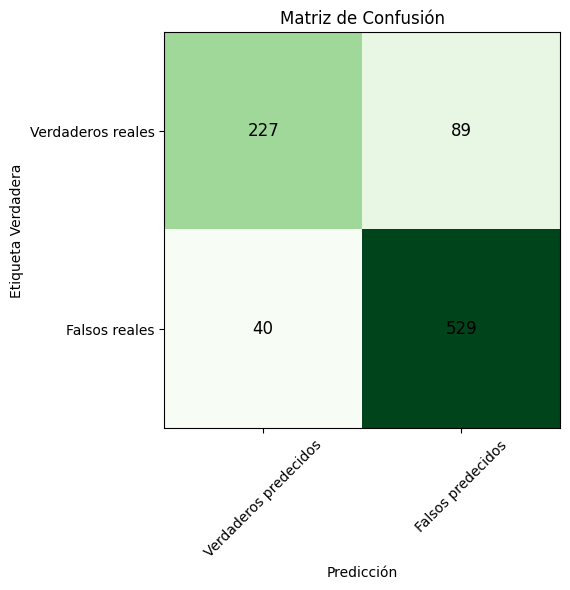

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(confusion_matrix):
    real_labels = ['Verdaderos reales', 'Falsos reales']
    predicted_labels = ['Verdaderos predecidos', 'Falsos predecidos']
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap='Greens')
    plt.title('Matriz de Confusión')
    for i in range(len(real_labels)):
        for j in range(len(predicted_labels)):
            plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='black', fontsize=12)

    plt.xticks(np.arange(len(predicted_labels)), predicted_labels, rotation=45)
    plt.yticks(np.arange(len(real_labels)), real_labels)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Predicción')

    plt.tight_layout()
    plt.show()
plot_confusion_matrix(conf_matrix)

## 3. Experimentación

### Hiperparámetros

Se define la siguiente función para medir la accuracy y f-score del algoritmo:

In [16]:
from sklearn import metrics

def id3_score(id3, train, test):
    id3.fit(train[train.columns[0:-1]], train["Target"])
    y_pred = id3.predict(test[test.columns[0:-1]])
    acc = metrics.accuracy_score(test["Target"], y_pred)
    f_score = metrics.f1_score(test["Target"], y_pred)
    return acc, f_score

Se pueden recorrer distintos valores de hiperpárametros para estudiar su efecto en el poder predictivo del modelo. Para eso se probaron 7 valores diferentes para `min_samples_split` y `min_split_gain`

In [17]:
min_samples_split_values = [5, 10, 40, 80, 100, 200, 500]
min_split_gain_values = [0, 0.005, 0.01, 0.1, 0.2, 0.4, 0.6]

best_accuaracy = 0
best_f_score = 0
best_params = {}
accuracy_grid = {}
f_score_grid = {}

for min_samples_split in min_samples_split_values:
  accuracy_grid[min_samples_split] = {}
  f_score_grid[min_samples_split] = {}
  for min_split_gain in min_split_gain_values:
    id3 = ID3(min_samples_split=min_samples_split, min_split_gain=min_split_gain)
    accuracy, f_score = id3_score(id3, train, test)
    accuracy_grid[min_samples_split][min_split_gain] = accuracy
    f_score_grid[min_samples_split][min_split_gain] = f_score

    if accuracy > best_accuaracy:
      best_accuaracy = accuracy
      best_params_acc = {"min_samples_split": min_samples_split, "min_split_gain": min_split_gain}
    if f_score > best_f_score:
      best_f_score = f_score
      best_params_f = {"min_samples_split": min_samples_split, "min_split_gain": min_split_gain}

print()
print(f"Mejor accuracy: {best_accuaracy}")
print(f"Mejores hiperparametros (segun acc): {best_params_acc}")
print()
print(f"Mejor f_score: {best_f_score}")
print(f"Mejores hiperparametros (segun f_score): {best_params_f}")


Mejor accuracy: 0.8542372881355932
Mejores hiperparametros (segun acc): {'min_samples_split': 100, 'min_split_gain': 0}

Mejor f_score: 0.8913226621735467
Mejores hiperparametros (segun f_score): {'min_samples_split': 100, 'min_split_gain': 0}


Los resultados se pueden visualizar con el siguiente *heatmap*, donde cada celda de la cuadrilla es una combinacion de ambos parametros

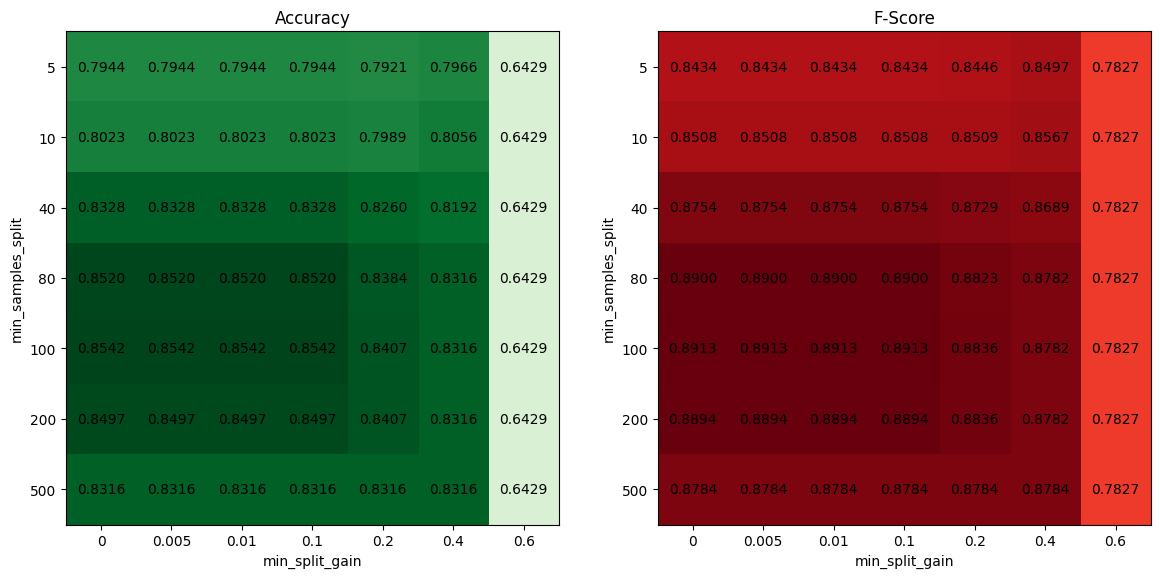

In [18]:
import numpy as np
import matplotlib.pyplot as plt

rows = min_samples_split_values
columns = min_split_gain_values

def plot_scores(accuracy_grid, f_score_grid):
    data_accuracy = np.array([[accuracy_grid[row][col] for col in columns] for row in rows])
    data_f_score = np.array([[f_score_grid[row][col] for col in columns] for row in rows])

    fig, ax = plt.subplots(1, 2, figsize=(14,8))
    ax[0].set_aspect('auto')
    ax[1].set_aspect('auto')

    heatmap1 = ax[0].imshow(data_accuracy, cmap='Greens', vmin=0.6)
    heatmap2 = ax[1].imshow(data_f_score, cmap='Reds', vmin=0.6)

    for i_key, i_val in enumerate(rows):
        for j_key, j_val in enumerate(columns):
            ax[0].text(j_key, i_key, f'{accuracy_grid[i_val][j_val]:.4f}', ha='center', va='center', color='black')
            ax[1].text(j_key, i_key, f'{f_score_grid[i_val][j_val]:.4f}', ha='center', va='center', color='black')

    ax[0].set_xticks(np.arange(len(columns)), labels=columns)
    ax[0].set_yticks(np.arange(len(rows)), labels=rows)
    ax[0].set_ylabel("min_samples_split")
    ax[0].set_xlabel("min_split_gain")
    ax[0].set_title("Accuracy")

    ax[1].set_xticks(np.arange(len(columns)), labels=columns)
    ax[1].set_yticks(np.arange(len(rows)), labels=rows)
    ax[1].set_ylabel("min_samples_split")
    ax[1].set_xlabel("min_split_gain")
    ax[1].set_title("F-Score")
    plt.show()
plot_scores(accuracy_grid, f_score_grid)

### Evaluación con Sklearn

Se realizaron las mismas pruebas con la implementación de DecisionTree y RandomForest de la librería Sklearn.

#### DecisionTree


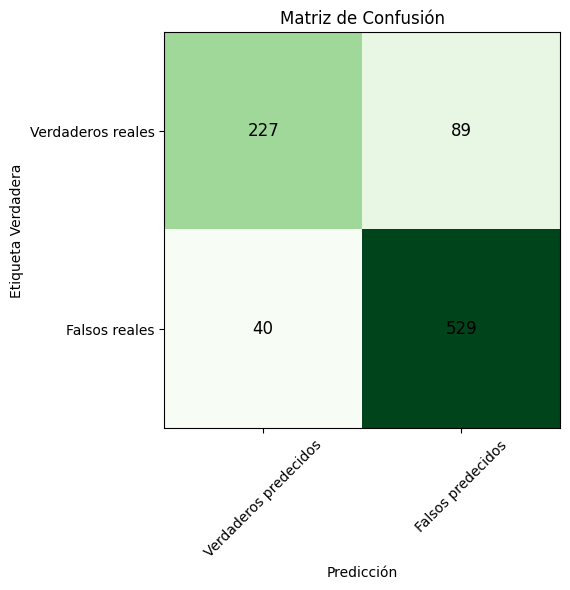

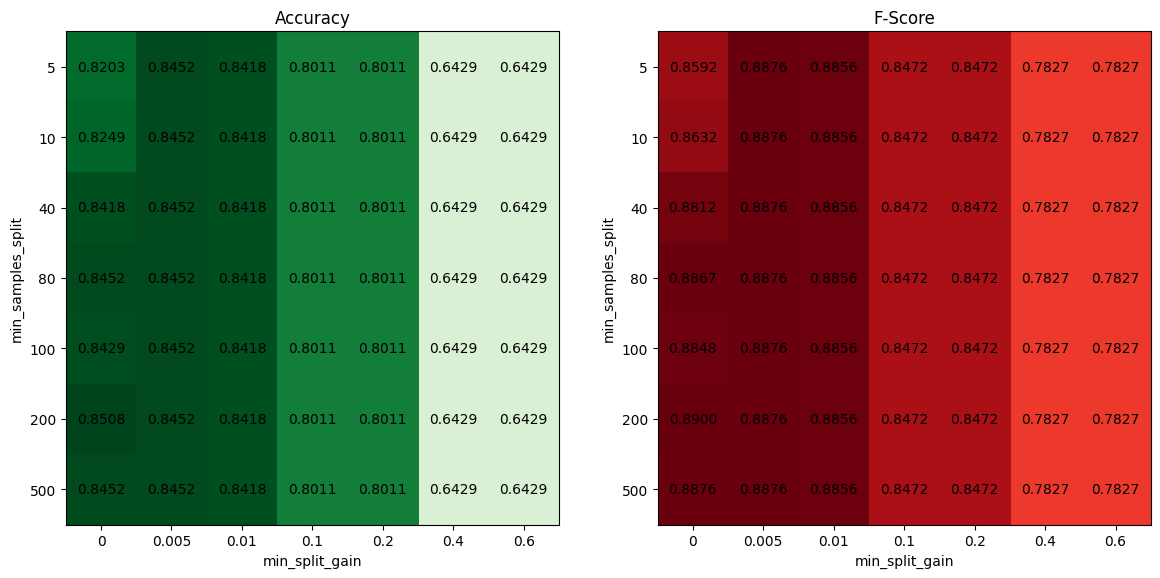

In [19]:
from sklearn import tree

for min_samples_split in min_samples_split_values:
  accuracy_grid[min_samples_split] = {}
  f_score_grid[min_samples_split] = {}
  for min_split_gain in min_split_gain_values:
    dct = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, min_impurity_decrease=min_split_gain, criterion='entropy')
    accuracy, f_score = id3_score(dct, train, test)
    accuracy_grid[min_samples_split][min_split_gain] = accuracy
    f_score_grid[min_samples_split][min_split_gain] = f_score
    
plot_confusion_matrix(metrics.confusion_matrix(test["Target"], pred))
plot_scores(accuracy_grid, f_score_grid)

La matriz de confusion para los mejores valores de hiperparametros obtenidos fue la siguiente

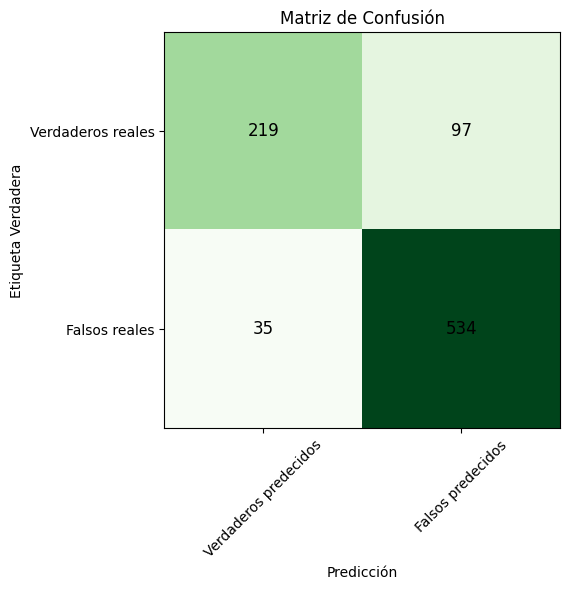

In [20]:
dct = tree.DecisionTreeClassifier(min_samples_split=200, min_impurity_decrease=0, criterion='entropy')
dct.fit(train[train.columns[0:-1]], train["Target"])
plot_confusion_matrix(metrics.confusion_matrix(test["Target"], dct.predict(test[test.columns[0:-1]])))

#### RandomForest

El algoritmo RandomForest crea varios DecisionTrees internamente, alterando varios parametros y subsets de entrenamiento para cada uno

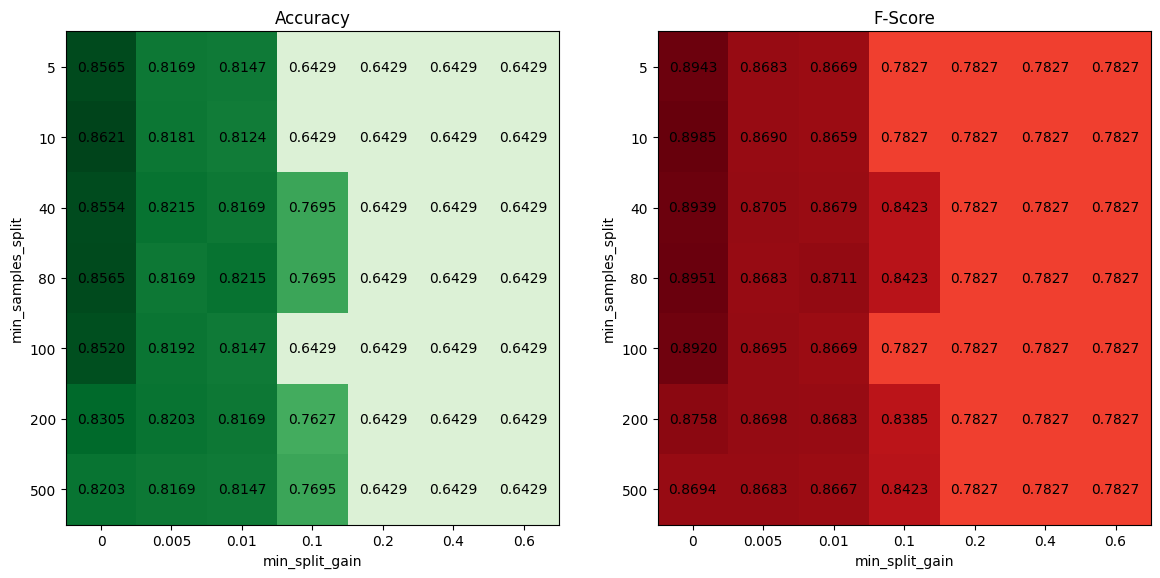

In [21]:
from sklearn import ensemble

for min_samples_split in min_samples_split_values:
  accuracy_grid[min_samples_split] = {}
  f_score_grid[min_samples_split] = {}
  for min_split_gain in min_split_gain_values:
    rfc = ensemble.RandomForestClassifier(min_samples_split=min_samples_split, min_impurity_decrease=min_split_gain)
    accuracy, f_score = id3_score(rfc, train, test)
    accuracy_grid[min_samples_split][min_split_gain] = accuracy
    f_score_grid[min_samples_split][min_split_gain] = f_score

plot_scores(accuracy_grid, f_score_grid)

## 4. Conclusión


Analizando la efectividad de la implementación de ID3 y comparándola con Sklearn se puede apreciar que ambas tienen resultados similares, incluso convergiendo en los mismos hiperparametros óptimos como se puede apreciar en las matrices de confusion y los heatmaps generados de f-score y accuracy.


Cuando se compara con el algoritmo RandomForest también se ve un rendimiento parecido aplicado al mismo dataset.


Según los experimentos realizados sobre los hiperparametros se ve un punto óptimo cuando `min_samples_split = 100`, donde luego comienza a decrecer la efectividad del algoritmo.
En el caso del hiperparámetro  `min_split_gain` se da su óptimo en 0 para todos los casos.


Teniendo en cuenta los resultados y la complejidad del código para su implementación se puede afirmar que la ventaja del DecisionTree es su gran poder predictivo a pesar de ser un algoritmo relativamente simple.
